In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [41]:
alexa = pd.read_csv('Amazon Alexa.csv', encoding = "ISO-8859-1")

In [42]:
# Having a look at the dataframe
alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [43]:
alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [44]:
alexa.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [45]:
# Checking for the presence of the null values
alexa.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [46]:
# Calculating the length of the text in the reviews and viewing its length across ratings
# Sorting the dataframe according to the ratings

alexa['Text Length'] = alexa['verified_reviews'].apply(len)
alexa.sort_values(['rating'], ascending=True, axis=0, inplace=True)
alexa.head()

,rating,date,variation,verified_reviews,feedback,Text Length
1906,1,26-Jul-18,White Plus,"It does not speak in Spanish,,,I bought it for...",0,124
2361,1,30-Jul-18,Configuration: Fire TV Stick,I liked it until on day after a year it no lon...,0,194
1236,1,26-Jul-18,Black Spot,I would love this but there is no way to stop ...,0,180
2314,1,30-Jul-18,Configuration: Fire TV Stick,Ordered 2 on deal day. 1 doesnt work and 2 nd...,0,77
2313,1,30-Jul-18,Configuration: Fire TV Stick,My old amazon fire stick kept crashing when us...,0,219


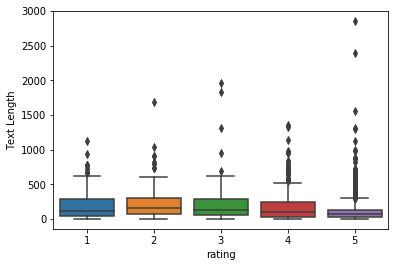

In [47]:
sns.boxplot(x='rating', y='Text Length', data=alexa)
plt.show()

In [48]:
# The text length for rating 5 is smaller (excluding outliers) than those of lower ratings
# This can be becasue people are more descriptive/vocal in negative feedbacks, but not so much in positive ones

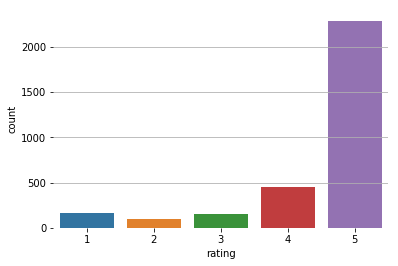

In [49]:
ax = sns.countplot(x="rating", data=alexa)
ax.yaxis.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

In [50]:
# The number of 5 star ratings is much higher than those of other ratings
# Thus, the resulting model is likely to perform better for the positive reviews than for the negative ones

In [51]:
# For our analysis, we will be using only ratings 1 and 5

alexa_1_5 = alexa[(alexa['rating']==1) | (alexa['rating']==5)]

# Sorting the ratings

alexa_1_5.head()

,rating,date,variation,verified_reviews,feedback,Text Length
1906,1,26-Jul-18,White Plus,"It does not speak in Spanish,,,I bought it for...",0,124
2361,1,30-Jul-18,Configuration: Fire TV Stick,I liked it until on day after a year it no lon...,0,194
1236,1,26-Jul-18,Black Spot,I would love this but there is no way to stop ...,0,180
2314,1,30-Jul-18,Configuration: Fire TV Stick,Ordered 2 on deal day. 1 doesnt work and 2 nd...,0,77
2313,1,30-Jul-18,Configuration: Fire TV Stick,My old amazon fire stick kept crashing when us...,0,219


In [52]:
# Rearranging the index

alexa_1_5.reset_index(inplace = True)
alexa_1_5.head()
alexa_1_5.drop('index', axis=1, inplace=True)
alexa_1_5.head()

C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,rating,date,variation,verified_reviews,feedback,Text Length
0,1,26-Jul-18,White Plus,"It does not speak in Spanish,,,I bought it for...",0,124
1,1,30-Jul-18,Configuration: Fire TV Stick,I liked it until on day after a year it no lon...,0,194
2,1,26-Jul-18,Black Spot,I would love this but there is no way to stop ...,0,180
3,1,30-Jul-18,Configuration: Fire TV Stick,Ordered 2 on deal day. 1 doesnt work and 2 nd...,0,77
4,1,30-Jul-18,Configuration: Fire TV Stick,My old amazon fire stick kept crashing when us...,0,219


In [53]:
# Classification 
# X - Verified Reviews
# y - Ratings

X = alexa_1_5['verified_reviews']
y = alexa_1_5['rating']

In [54]:
# We will need a function to convert the text into a list of words
# It will remove the punctuations and stopwords
# Following is that function

import string
def word_list(text):
    
    imp_words = [char for char in text if char not in string.punctuation]
    imp_words = ''.join(imp_words)
    
    return [word for word in imp_words.split() if word.lower() not in stopwords.words('english')]

In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
# Following is an example of how the function works

example = "Hello! We need to remove the punctuations and additional characters - such as \,*"
print(word_list(example))

['Hello', 'need', 'remove', 'punctuations', 'additional', 'characters']


In [57]:
# Importing CounterVectorizer and fitting instance to text in X
# Using word_list function as analyzer
# Finding the size of the vocabulary in the vectorizer

from sklearn.feature_extraction.text import CountVectorizer
text_matrix = CountVectorizer(analyzer=word_list).fit(X)
len(text_matrix.vocabulary_)

3986

In [58]:
# To see how vectorizer shows the number of unique words and their frequency


# Following is the review
review_10 = X[10]
review_10

"Great product and I would give 5 stars - but you can't scroll face cards without having the stupid &#34;try and ask Alexa&#34; suggestions pop up.  Yes you can have it scroll once, and just stay on the clock, but I like having other cards as well. God its the worst and SO irritating.  I got it super cheap, so i just face the screen toward the wall and treat it like a Dot instead of a Spot.  What a dumb move on Amazons? part."

In [59]:
transform_20 = text_matrix.transform([review_10])
transform_20

<1x3986 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [60]:
print(transform_20)

  (0, 70)	1
  (0, 88)	1
  (0, 142)	1
  (0, 162)	1
  (0, 311)	1
  (0, 418)	1
  (0, 429)	1
  (0, 754)	1
  (0, 903)	1
  (0, 1080)	1
  (0, 1294)	1
  (0, 1303)	2
  (0, 1349)	1
  (0, 1377)	1
  (0, 1724)	1
  (0, 1877)	2
  (0, 2026)	1
  (0, 2048)	1
  (0, 2258)	1
  (0, 2304)	1
  (0, 2430)	2
  (0, 2595)	1
  (0, 2796)	1
  (0, 2892)	1
  (0, 2946)	1
  (0, 3215)	1
  (0, 3221)	2
  (0, 3449)	1
  (0, 3460)	1
  (0, 3490)	1
  (0, 3508)	1
  (0, 3510)	1
  (0, 3660)	1
  (0, 3677)	1
  (0, 3841)	1
  (0, 3879)	1
  (0, 3910)	1
  (0, 3929)	1
  (0, 3931)	1


In [61]:
# The review has 39 unique words
# 4 of the unique words qppear twice
# Let's check what those word are

print(text_matrix.get_feature_names()[1303])
print(text_matrix.get_feature_names()[1877])
print(text_matrix.get_feature_names()[2430])
print(text_matrix.get_feature_names()[3221])

cards
face
like
scroll


In [62]:
# we can transform our X dataframe into a sparse matrix, using transform()

X = text_matrix.transform(X)

In [63]:
# Shape of the matrix and the number of non-zero values

print('Sparse Matrix Shape: ', X.shape)
print('Non-Zero occurrences = ', X.nnz)

Sparse Matrix Shape:  (2447, 3986)
Non-Zero occurrences =  25728


In [64]:
# Splitting the dataset in training and testing, with 30% for test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
# Training Model - Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
# Testing and evaluating the model
from sklearn.metrics import confusion_matrix, classification_report


y_pred_mnb = mnb.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_mnb))
print('\n')
print('Classification Report')
print(classification_report(y_test, y_pred_mnb))

Confusion Matrix
[[ 19  26]
 [  6 684]]


Classification Report
              precision    recall  f1-score   support

           1       0.76      0.42      0.54        45
           5       0.96      0.99      0.98       690

   micro avg       0.96      0.96      0.96       735
   macro avg       0.86      0.71      0.76       735
weighted avg       0.95      0.96      0.95       735



In [67]:
# The recall rate for 1 is much lower that that for 5
# The performance aligns with our expectation that few instances of 1 star rating will negatively impact recall for 1